Line Chart


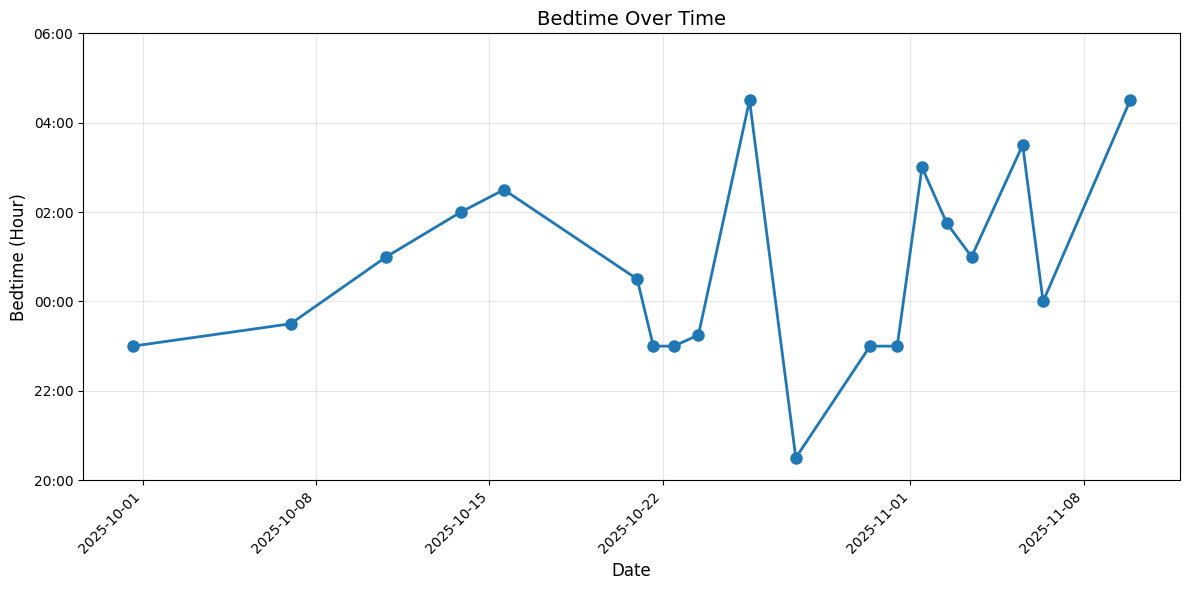

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load the survey data
survey_df = pd.read_csv('survey-responses.csv')

# Convert bedtime to datetime
def time_to_hours(time_str):
    """Convert time string to hours (decimal format for plotting)"""
    if pd.isna(time_str) or time_str == 'X':
        return np.nan
    try:
        time_str = str(time_str).strip()
        time_obj = pd.to_datetime(time_str, format='%H:%M:%S').time()
        # Convert to decimal hours (e.g., 23:30 = 23.5)
        hours = time_obj.hour + time_obj.minute / 60
        # Adjust for times after midnight (0-6 AM should be 24-30 for continuity)
        if hours < 12:  # Assume times before noon are actually late night/early morning
            hours += 24
        return hours
    except:
        return np.nan

survey_df['bedtime_hours'] = survey_df['What time did you get in bed?'].apply(time_to_hours)
survey_df['Timestamp'] = pd.to_datetime(survey_df['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# Filter valid data
valid_data = survey_df[survey_df['bedtime_hours'].notna()].copy()

# Create chart
plt.figure(figsize=(12, 6))
plt.plot(valid_data['Timestamp'], valid_data['bedtime_hours'],
         marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bedtime (Hour)', fontsize=12)
plt.title('Bedtime Over Time', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Format y-axis to show actual times
yticks = range(20, 32, 2)  # 20:00 (8 PM) to 30:00 (6 AM next day)
ytick_labels = [f"{h%24:02d}:00" for h in yticks]
plt.yticks(yticks, ytick_labels)

plt.tight_layout()
plt.savefig('bedtime_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

Histogram


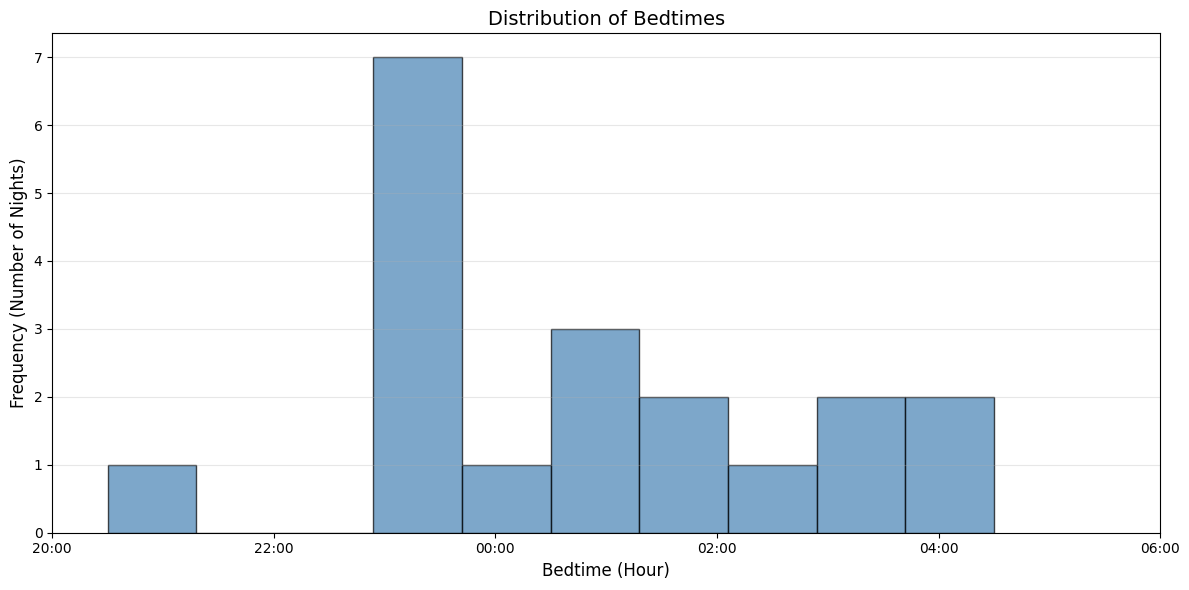

In [2]:
survey_df['bedtime_hours'] = survey_df['What time did you get in bed?'].apply(time_to_hours)

# Filter valid data
valid_data = survey_df[survey_df['bedtime_hours'].notna()].copy()

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(valid_data['bedtime_hours'], bins=10, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Bedtime (Hour)', fontsize=12)
plt.ylabel('Frequency (Number of Nights)', fontsize=12)
plt.title('Distribution of Bedtimes', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

# Format x-axis to show actual times
xticks = range(20, 32, 2)
xtick_labels = [f"{h%24:02d}:00" for h in xticks]
plt.xticks(xticks, xtick_labels)

plt.tight_layout()
plt.savefig('bedtime_histogram.png', dpi=300, bbox_inches='tight')
plt.show()